# Assignment Name: Advanced Regression (Surprise Housing)

## Step 1 - Importing libraries

In [1]:
# For analysis and numerical functions
import numpy as np
import pandas as pd

# For Visualazation
import matplotlib.pyplot as plt
import seaborn as sns

# For Train Test model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model, metrics

# For best feature variable selection
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Statistics
from scipy import stats
from scipy.stats import norm, skew 

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2: Reading and Understanding the Data

In [2]:
# Reading house data into 'housing_data' dataframe
housing_data = pd.read_csv("train.csv", low_memory=False)
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Checking the data info
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Checking the shape
housing_data.shape

(1460, 81)

In [5]:
# Checking data type of all the columns
housing_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
# Checking missing values
housing_data.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [7]:
# Checking the details of numeriacl data
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Checking the columns
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# Checking the datatypes
housing_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [10]:
# Checking unique values for each columns
housing_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [11]:
# Check the percentage of missing data
missing_Data = pd.DataFrame(round(housing_data.isnull().sum()/len(housing_data.index)*100,2).sort_values(ascending=False),columns=["% Missing Data"])
missing_Data.index.name = 'Columns'
missing_Data.head(20)

,% Missing Data
Columns,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


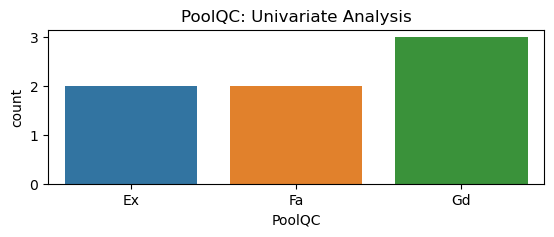

In [12]:
# Data imputation for column 'PoolQC'
plt.figure().set_figheight(2)
sns.countplot(x=housing_data['PoolQC'],data=housing_data)
plt.title("PoolQC: Univariate Analysis")
plt.show()

In [13]:
# Checking the value counts
housing_data['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [14]:
# Replacing the missing values in 'PoolQC' with the value No_Pool.
housing_data['PoolQC'] = housing_data['PoolQC'].replace(np.nan,'No_Pool')

In [15]:
# Checking the value counts again
housing_data['PoolQC'].value_counts()

No_Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

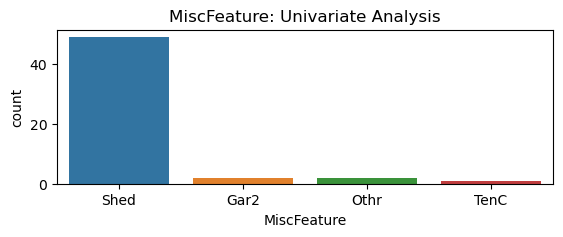

In [16]:
# Data imputation for column 'MiscFeature'
plt.figure().set_figheight(2)
sns.countplot(x=housing_data['MiscFeature'],data=housing_data)
plt.title("MiscFeature: Univariate Analysis")
plt.show()

In [17]:
# Checking the value counts
housing_data['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [18]:
# Replacing the missing values in 'MiscFeature' with the value None.
housing_data['MiscFeature'] = housing_data['MiscFeature'].replace(np.nan,'None')

In [19]:
# Checking the value counts again
housing_data['MiscFeature'].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

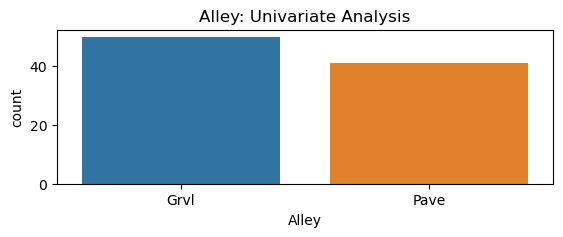

In [20]:
# Data imputation for column 'Alley'
plt.figure().set_figheight(2)
sns.countplot(x=housing_data['Alley'],data=housing_data)
plt.title("Alley: Univariate Analysis")
plt.show()

In [21]:
# Checking the value counts
housing_data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [22]:
# Replacing the missing values in 'Alley' with the value No_Alley_Access.
housing_data['Alley'] = housing_data['Alley'].replace(np.nan,'No_Alley_Access')

In [23]:
# Checking the value counts again
housing_data['Alley'].value_counts()

No_Alley_Access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

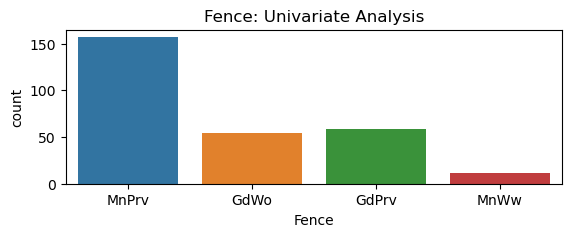

In [24]:
# Data imputation for column 'Fence'
plt.figure().set_figheight(2)
sns.countplot(x=housing_data['Fence'],data=housing_data)
plt.title("Fence: Univariate Analysis")
plt.show()

In [25]:
# Checking the value counts
housing_data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [26]:
# Replacing the missing values in 'Fence' with the value No_Fence.
housing_data['Fence'] = housing_data['Fence'].replace(np.nan,'No_Fence')

In [27]:
# Checking the value counts again
housing_data['Fence'].value_counts()

No_Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

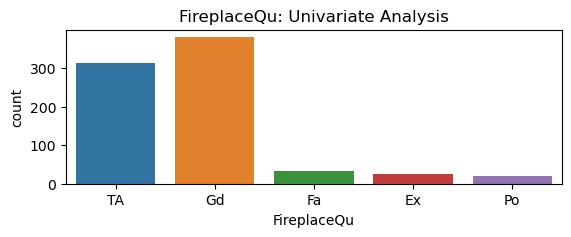

In [28]:
# Data imputation for column 'FireplaceQu'
plt.figure().set_figheight(2)
sns.countplot(x=housing_data['FireplaceQu'],data=housing_data)
plt.title("FireplaceQu: Univariate Analysis")
plt.show()

In [29]:
# Checking the value counts
housing_data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [30]:
# Replacing the missing values in 'FireplaceQu' with the value No_Fireplace.
housing_data['FireplaceQu'] = housing_data['FireplaceQu'].replace(np.nan,'No_Fireplace')

In [31]:
# Checking the value counts again
housing_data['FireplaceQu'].value_counts()

No_Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

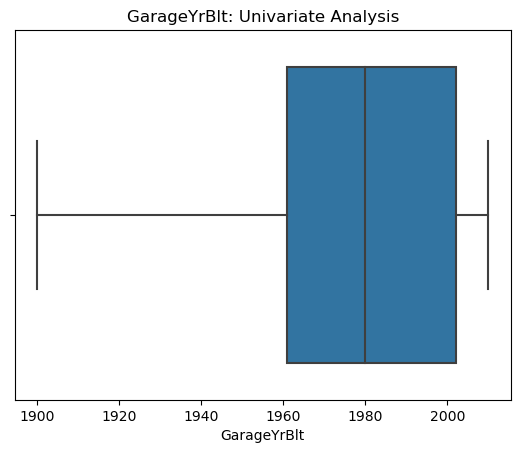

In [32]:
# Chekcing outlier for column GarageYrBlt
sns.boxplot(x=housing_data['GarageYrBlt'])
plt.title("GarageYrBlt: Univariate Analysis")
plt.show()

In [33]:
# Replacing the missing values in 'GarageYrBlt' with the value 0.
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna(0)

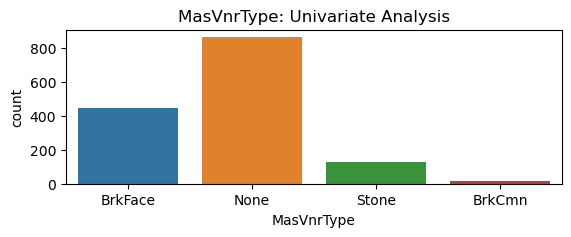

In [34]:
# Data imputation for column 'MasVnrType'
plt.figure().set_figheight(2)
sns.countplot(x=housing_data['MasVnrType'],data=housing_data)
plt.title("MasVnrType: Univariate Analysis")
plt.show()

In [35]:
# Checking the value counts
housing_data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [36]:
# Replacing the missing values in 'MasVnrType' with the value None.
housing_data['MasVnrType'] = housing_data['MasVnrType'].replace(np.nan,'None')

In [37]:
# Checking the value counts again
housing_data['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

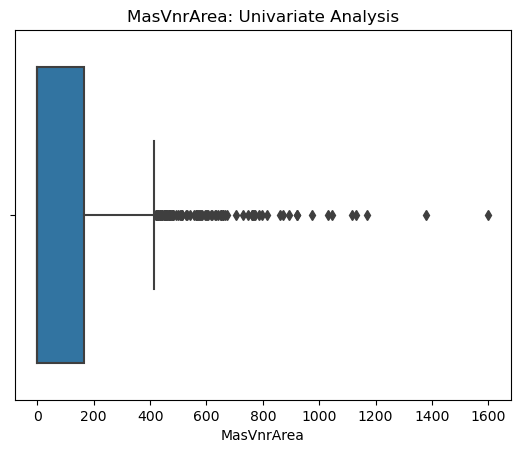

In [38]:
# Chekcing outlier for column MasVnrArea
sns.boxplot(x=housing_data['MasVnrArea'])
plt.title("MasVnrArea: Univariate Analysis")
plt.show()

In [39]:
# Replacing the missing values in 'MasVnrArea' with the value 0.
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].fillna(0)

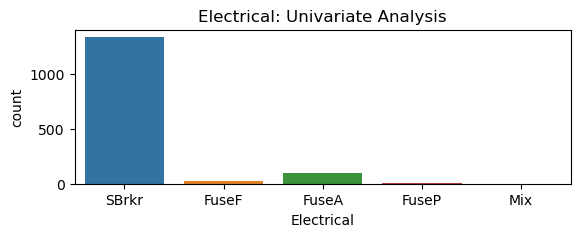

In [40]:
# Data imputation for column 'Electrical'
plt.figure().set_figheight(2)
sns.countplot(x=housing_data['Electrical'],data=housing_data)
plt.title("Electrical: Univariate Analysis")
plt.show()

In [41]:
# Checking the value counts
housing_data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [42]:
# Replacing the missing values in 'Electrical' with the value Other.
housing_data['Electrical'] = housing_data['Electrical'].replace(np.nan,'Other')

In [43]:
# Checking the value counts again
housing_data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Other       1
Name: Electrical, dtype: int64

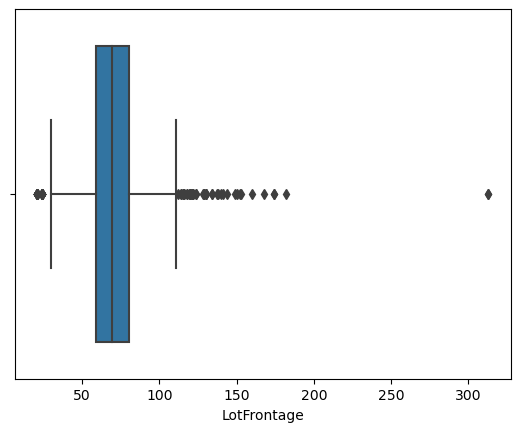

In [44]:
# Chekcing outlier for column LotFrontage
sns.boxplot(x=housing_data['LotFrontage'])
plt.show()

In [45]:
# Replacing the missing values in 'LotFrontage' with the median of value LotFrontage.
housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].median(),inplace=True)

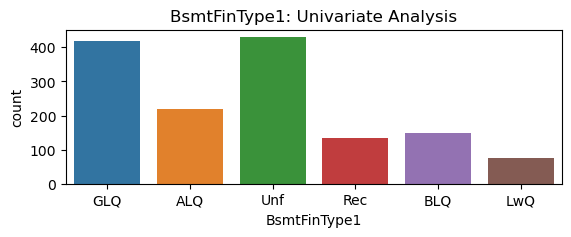

In [46]:
# Data imputation for column 'BsmtFinType1'
plt.figure().set_figheight(2)
sns.countplot(x=housing_data['BsmtFinType1'],data=housing_data)
plt.title("BsmtFinType1: Univariate Analysis")
plt.show()

In [47]:
# Checking the value counts
housing_data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [48]:
# Replacing the missing values in 'BsmtFinType1' with the value No_Basement.
housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].replace(np.nan,'No_Basement')

In [49]:
# Checking the value counts again
housing_data['BsmtFinType1'].value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No_Basement     37
Name: BsmtFinType1, dtype: int64

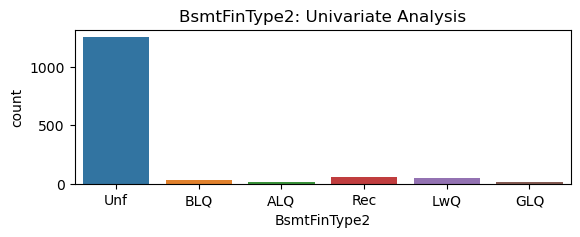

In [50]:
# Data imputation for column 'BsmtFinType2'
plt.figure().set_figheight(2)
sns.countplot(x=housing_data['BsmtFinType2'],data=housing_data)
plt.title("BsmtFinType2: Univariate Analysis")
plt.show()

In [51]:
# Checking the value counts
housing_data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [52]:
# Replacing the missing values in 'BsmtFinType2' with the value No_Basement.
housing_data['BsmtFinType2'] = housing_data['BsmtFinType2'].replace(np.nan,'No_Basement')

In [53]:
# Checking the value counts again
housing_data['BsmtFinType2'].value_counts()

Unf            1256
Rec              54
LwQ              46
No_Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

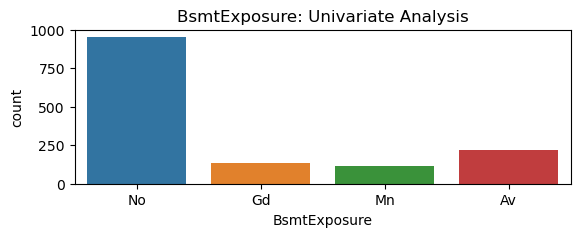

In [54]:
# Data imputation for column 'BsmtExposure'
plt.figure().set_figheight(2)
sns.countplot(x=housing_data['BsmtExposure'],data=housing_data)
plt.title("BsmtExposure: Univariate Analysis")
plt.show()

In [55]:
# Checking the value counts
housing_data['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [56]:
# Replacing the missing values in 'BsmtExposure' with the value No_Basement.
housing_data['BsmtExposure'] = housing_data['BsmtExposure'].replace(np.nan,'No_Basement')

In [57]:
# Checking the value counts again
housing_data['BsmtExposure'].value_counts()

No             953
Av             221
Gd             134
Mn             114
No_Basement     38
Name: BsmtExposure, dtype: int64

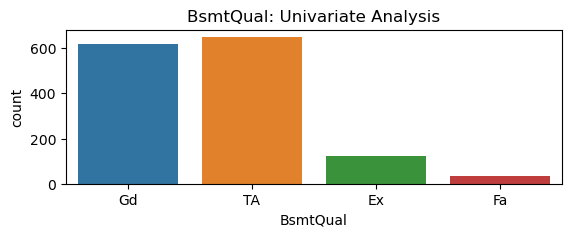

In [58]:
# Data imputation for column 'BsmtQual'
plt.figure().set_figheight(2)
sns.countplot(x=housing_data['BsmtQual'],data=housing_data)
plt.title("BsmtQual: Univariate Analysis")
plt.show()

In [59]:
# Checking the value counts
housing_data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [60]:
# Replacing the missing values in 'BsmtQual' with the value No_Basement.
housing_data['BsmtQual'] = housing_data['BsmtQual'].replace(np.nan,'No_Basement')

In [61]:
# Checking the value counts again
housing_data['BsmtQual'].value_counts()

TA             649
Gd             618
Ex             121
No_Basement     37
Fa              35
Name: BsmtQual, dtype: int64

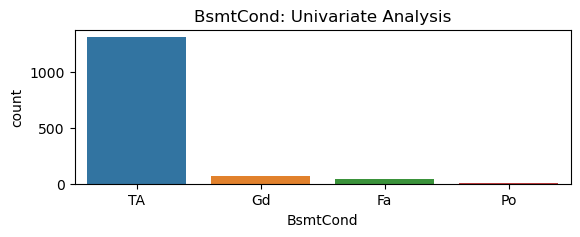

In [62]:
# Data imputation for column 'BsmtCond'
plt.figure().set_figheight(2)
sns.countplot(x=housing_data['BsmtCond'],data=housing_data)
plt.title("BsmtCond: Univariate Analysis")
plt.show()

In [63]:
# Checking the value counts
housing_data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [64]:
# Replacing the missing values in 'BsmtCond' with the value No_Basement.
housing_data['BsmtCond'] = housing_data['BsmtCond'].replace(np.nan,'No_Basement')

In [65]:
# Checking the value counts again
housing_data['BsmtCond'].value_counts()

TA             1311
Gd               65
Fa               45
No_Basement      37
Po                2
Name: BsmtCond, dtype: int64

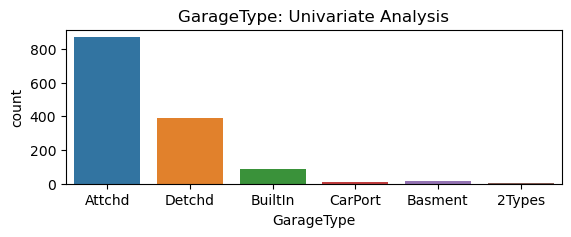

In [66]:
# Data imputation for column 'GarageType'
plt.figure().set_figheight(2)
sns.countplot(x=housing_data['GarageType'],data=housing_data)
plt.title("GarageType: Univariate Analysis")
plt.show()

In [67]:
# Checking the value counts
housing_data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [68]:
# Replacing the missing values in 'GarageType' with the value No_Garage.
housing_data['GarageType'] = housing_data['GarageType'].replace(np.nan,'No_Garage')

In [69]:
# Checking the value counts again
housing_data['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No_Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

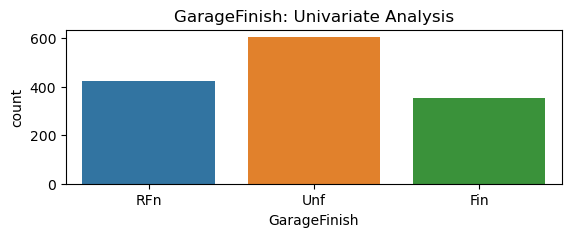

In [70]:
# Data imputation for column 'GarageFinish'
plt.figure().set_figheight(2)
sns.countplot(x=housing_data['GarageFinish'],data=housing_data)
plt.title("GarageFinish: Univariate Analysis")
plt.show()

In [71]:
# Checking the value counts
housing_data['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [72]:
# Replacing the missing values in 'GarageFinish' with the value No_Garage.
housing_data['GarageFinish'] = housing_data['GarageFinish'].replace(np.nan,'No_Garage')

In [73]:
# Checking the value counts again
housing_data['GarageFinish'].value_counts()

Unf          605
RFn          422
Fin          352
No_Garage     81
Name: GarageFinish, dtype: int64

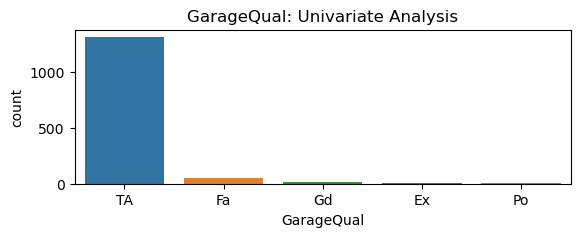

In [74]:
# Data imputation for column 'GarageQual'
plt.figure().set_figheight(2)
sns.countplot(x=housing_data['GarageQual'],data=housing_data)
plt.title("GarageQual: Univariate Analysis")
plt.show()

In [75]:
# Checking the value counts
housing_data['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [76]:
# Replacing the missing values in 'GarageQual' with the value No_Garage.
housing_data['GarageQual'] = housing_data['GarageQual'].replace(np.nan,'No_Garage')

In [77]:
# Checking the value counts again
housing_data['GarageQual'].value_counts()

TA           1311
No_Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64

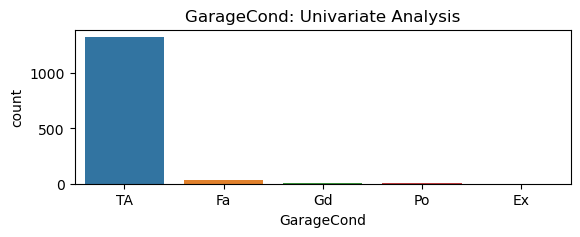

In [78]:
# Data imputation for column 'GarageCond'
plt.figure().set_figheight(2)
sns.countplot(x=housing_data['GarageCond'],data=housing_data)
plt.title("GarageCond: Univariate Analysis")
plt.show()

In [79]:
# Checking the value counts
housing_data['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [80]:
# Replacing the missing values in 'GarageCond' with the value No_Garage.
housing_data['GarageCond'] = housing_data['GarageCond'].replace(np.nan,'No_Garage')

In [81]:
# Checking the value counts again
housing_data['GarageCond'].value_counts()

TA           1326
No_Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [82]:
# Checking the missing values after data imputation
missing_data = pd.DataFrame(round(housing_data.isnull().sum()/len(housing_data.index)*100,2).sort_values(ascending=False),columns=["% Missing Data"])
missing_data.index.name = 'Columns'
missing_data.head(10)

,% Missing Data
Columns,
Id,0.0
CentralAir,0.0
GarageYrBlt,0.0
GarageType,0.0
FireplaceQu,0.0
Fireplaces,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0


In [83]:
# Checking the shape once again
housing_data.shape

(1460, 81)

In [84]:
# Checking the details of numeriacl data
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [85]:
# Converting column GarageYrBlt as integer
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].astype(int)

In [86]:
# Getting all Numerical columns
numerical_columns = housing_data.select_dtypes(exclude='object').columns
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [87]:
# Getting all Categorical columns
categorical_columns = housing_data.select_dtypes(include='object').columns
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Step 3: EDA

### Step 3.1: Univariate analysis of numerical columns

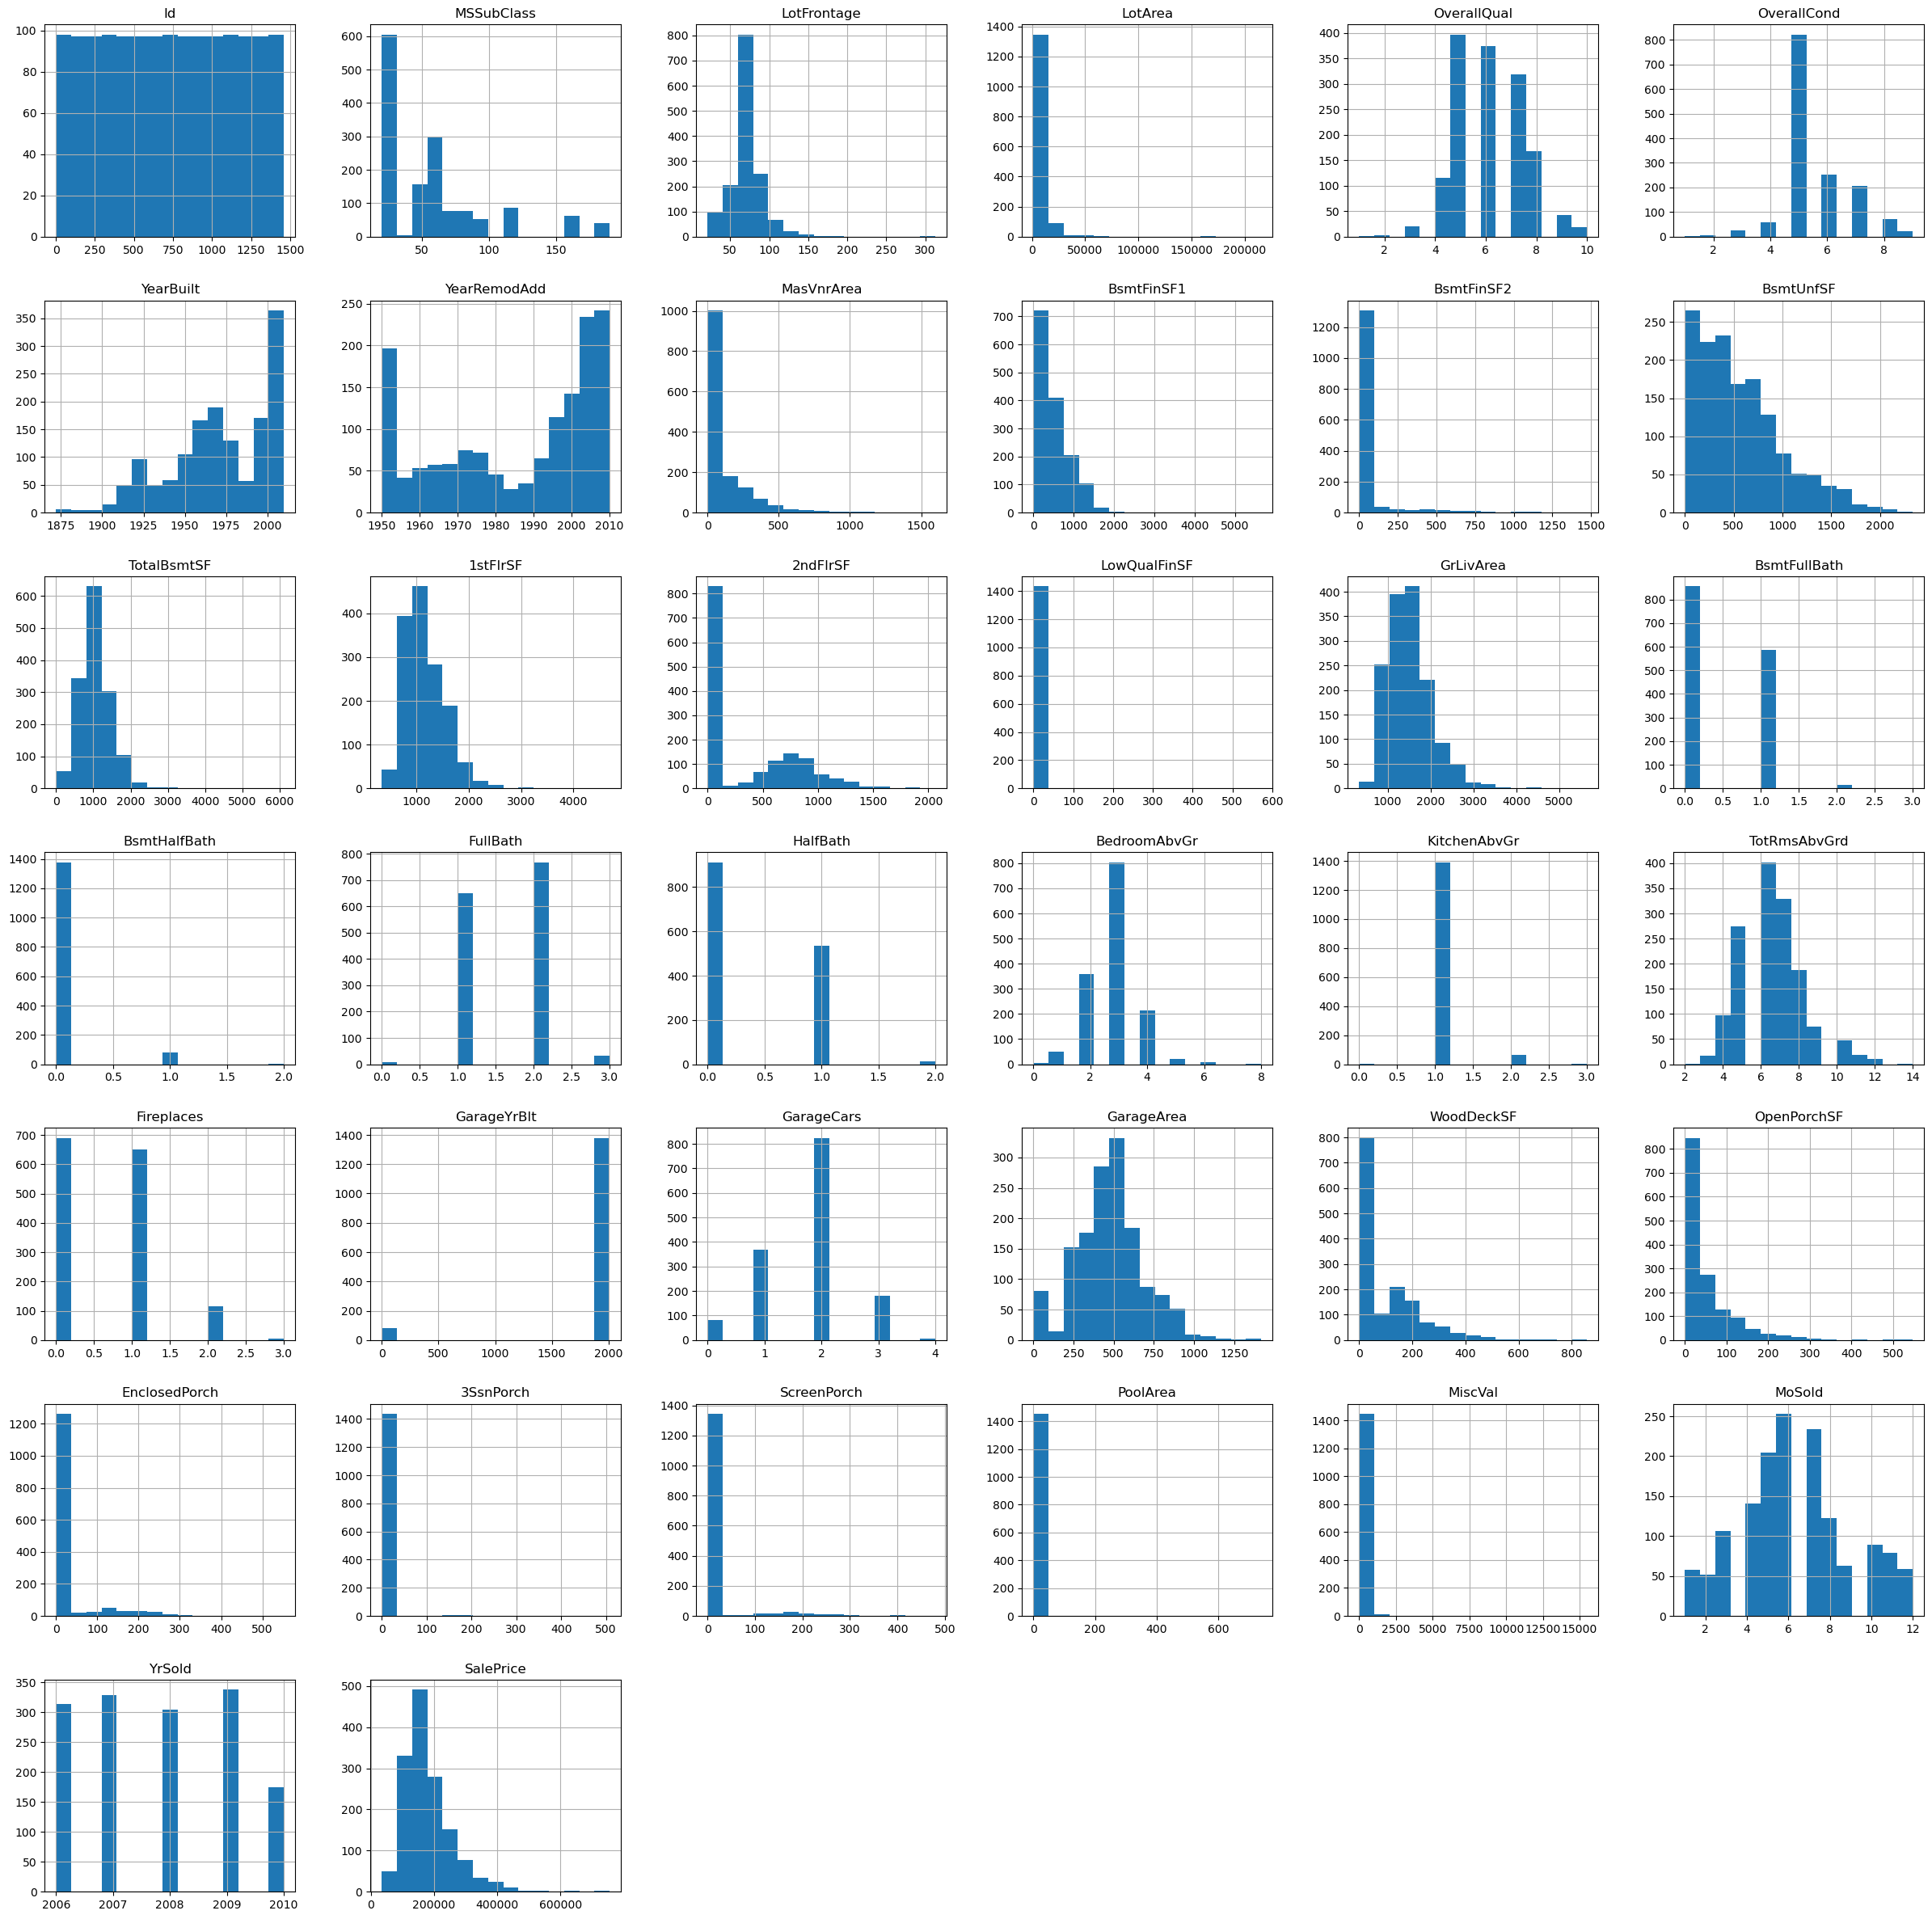

In [88]:
# Ploting numerical columns on histogram for further analysis
housing_data[numerical_columns].hist(bins=15, figsize=(30, 30))
plt.show()

In [89]:
# Checking Correlation
housing_data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


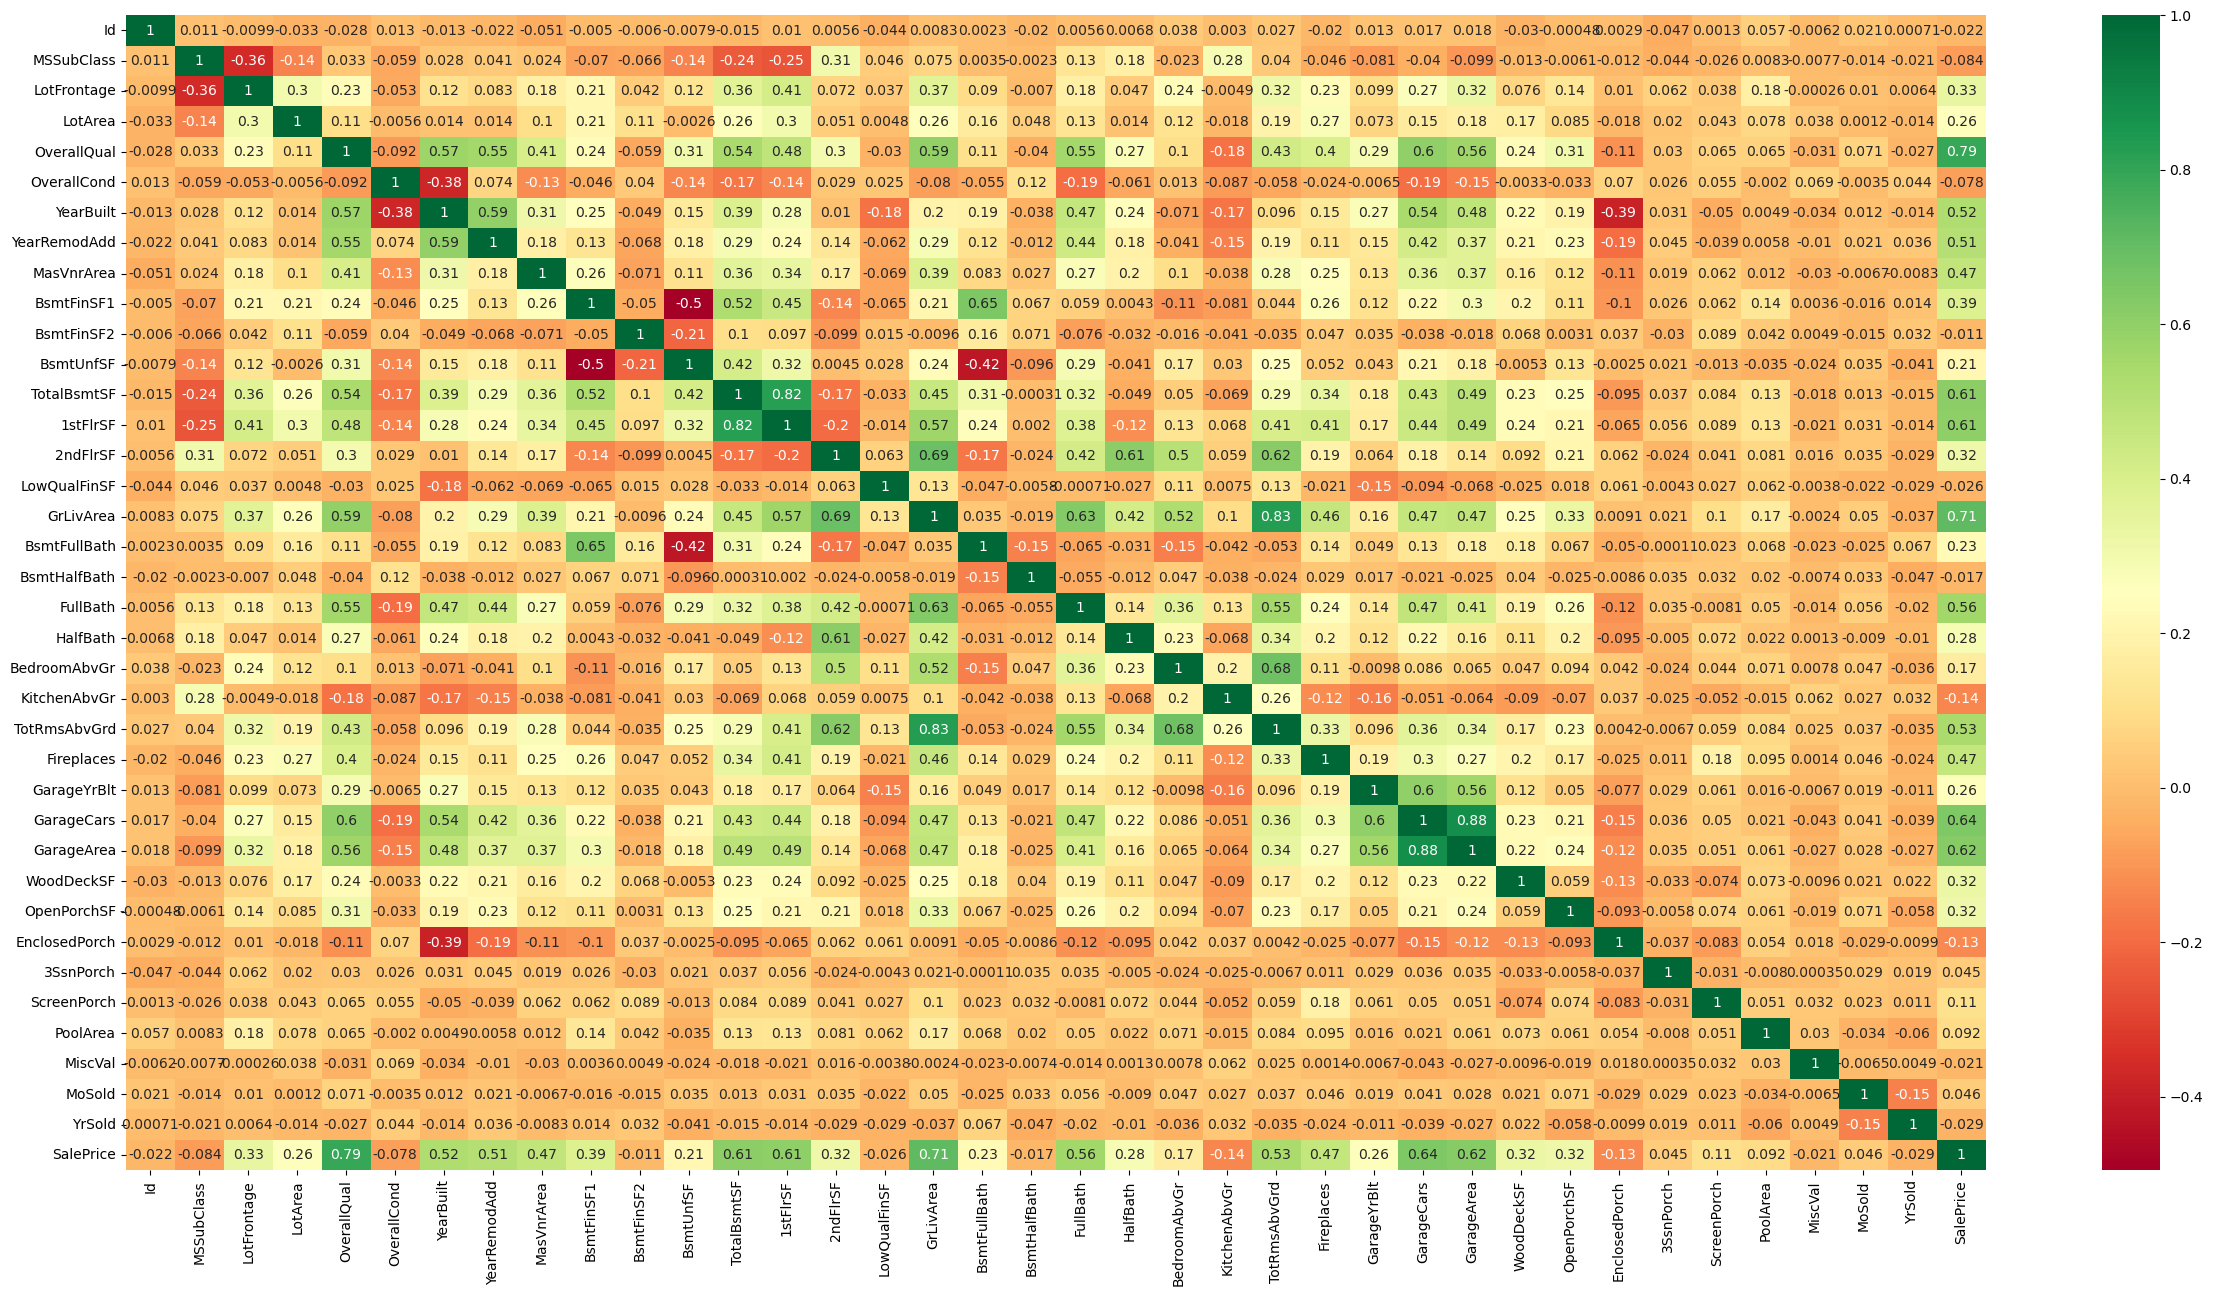

In [90]:
# Plotting correlations on a heatmap
plt.figure(figsize=(30,15))
sns.heatmap(housing_data.corr(),cmap="RdYlGn",annot=True)
plt.show()

#### Top 5 high positive correlated features:
<li> SalePrice is very high positively correlated to the OverallQual(0.79)</li>
<li> SalePrice is very high positively correlated to the GrLivArea (0.71)</li>
<li>  SalePrice is very high positively correlated to the GarageCars(0.64)</li>
<li>  SalePrice is very high positively correlated to the GarageAre(0.62)</li>
<li>  SalePrice is very high positively correlated to the 1stFlrSF (0.61)</li>

### Step 3.2: Bivariate analysis of highly correlated variavbles

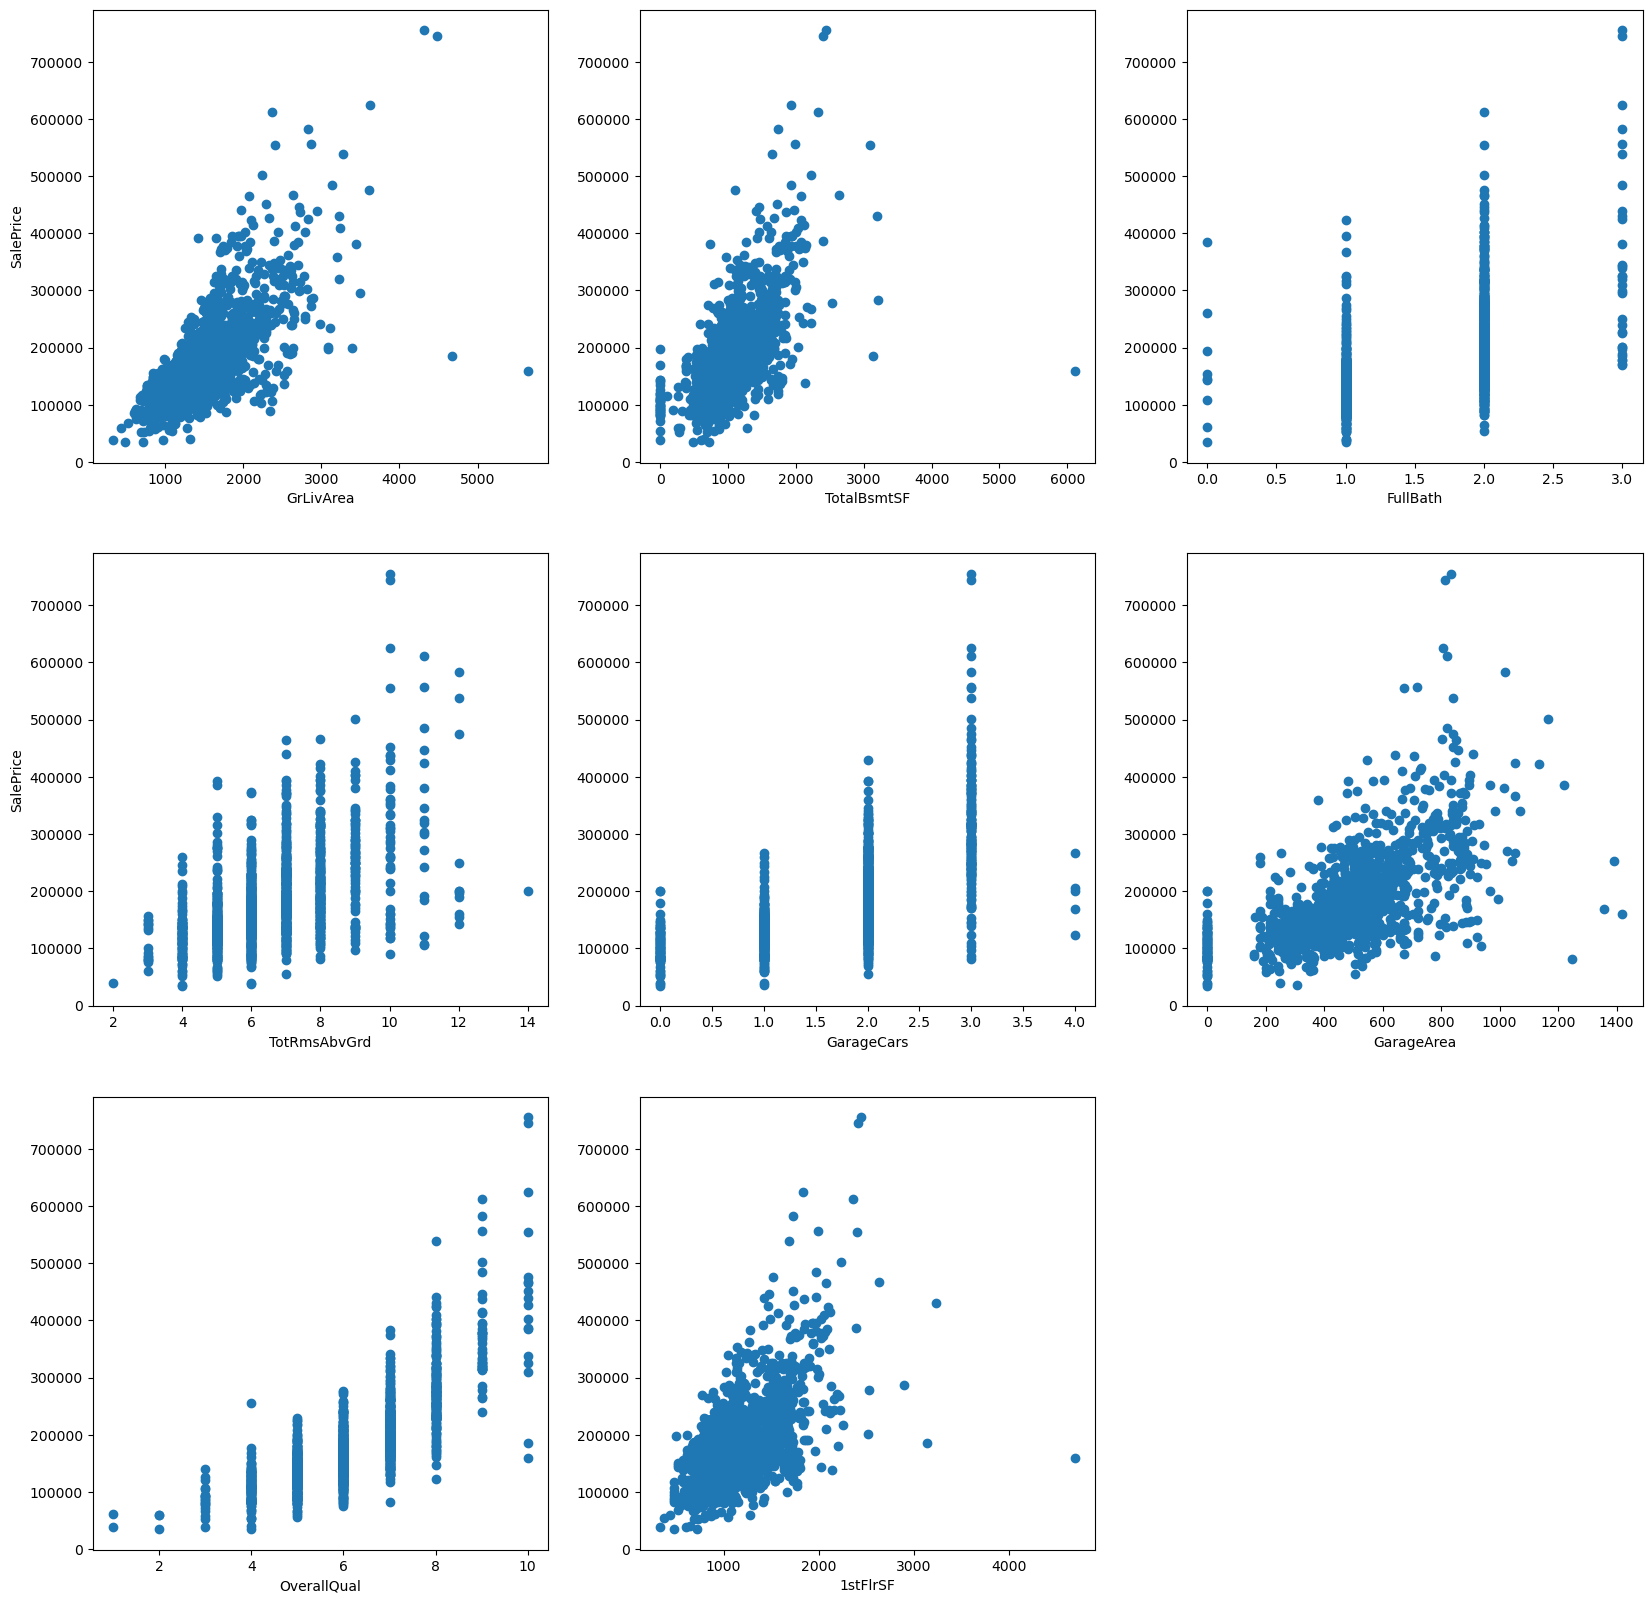

In [91]:
# Scatter plot for further analysis
plt.figure(figsize = (20,20)) 

# GrLivArea vs SalePrice
plt.subplot(3,3,1)
plt.scatter(housing_data['GrLivArea'], housing_data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

# TotalBsmtSF vs SalePrice
plt.subplot(3,3,2)
plt.scatter(housing_data['TotalBsmtSF'], housing_data['SalePrice'])
plt.xlabel('TotalBsmtSF')

# FullBath vs SalePrice
plt.subplot(3,3,3)
plt.scatter(housing_data['FullBath'], housing_data['SalePrice'])
plt.xlabel('FullBath')

# TotRmsAbvGrd vs SalePrice
plt.subplot(3,3,4)
plt.scatter(housing_data['TotRmsAbvGrd'], housing_data['SalePrice'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')

# GarageCars vs SalePrice
plt.subplot(3,3,5)
plt.scatter(housing_data['GarageCars'], housing_data['SalePrice'])
plt.xlabel('GarageCars')

# GarageArea vs SalePrice
plt.subplot(3,3,6)
plt.scatter(housing_data['GarageArea'], housing_data['SalePrice'])
plt.xlabel('GarageArea')

# OverallQual vs SalePrice
plt.subplot(3,3,7)
plt.scatter(housing_data['OverallQual'], housing_data['SalePrice'])
plt.xlabel('OverallQual')

# 1stFlrSF vs SalePrice
plt.subplot(3,3,8)
plt.scatter(housing_data['1stFlrSF'], housing_data['SalePrice'])
plt.xlabel('1stFlrSF')
plt.show()

<li>Variables are linearly correlated to SalePrice so we can try to build the regresssion model.</li>

### Step 3.3: Visualising the categorical variables

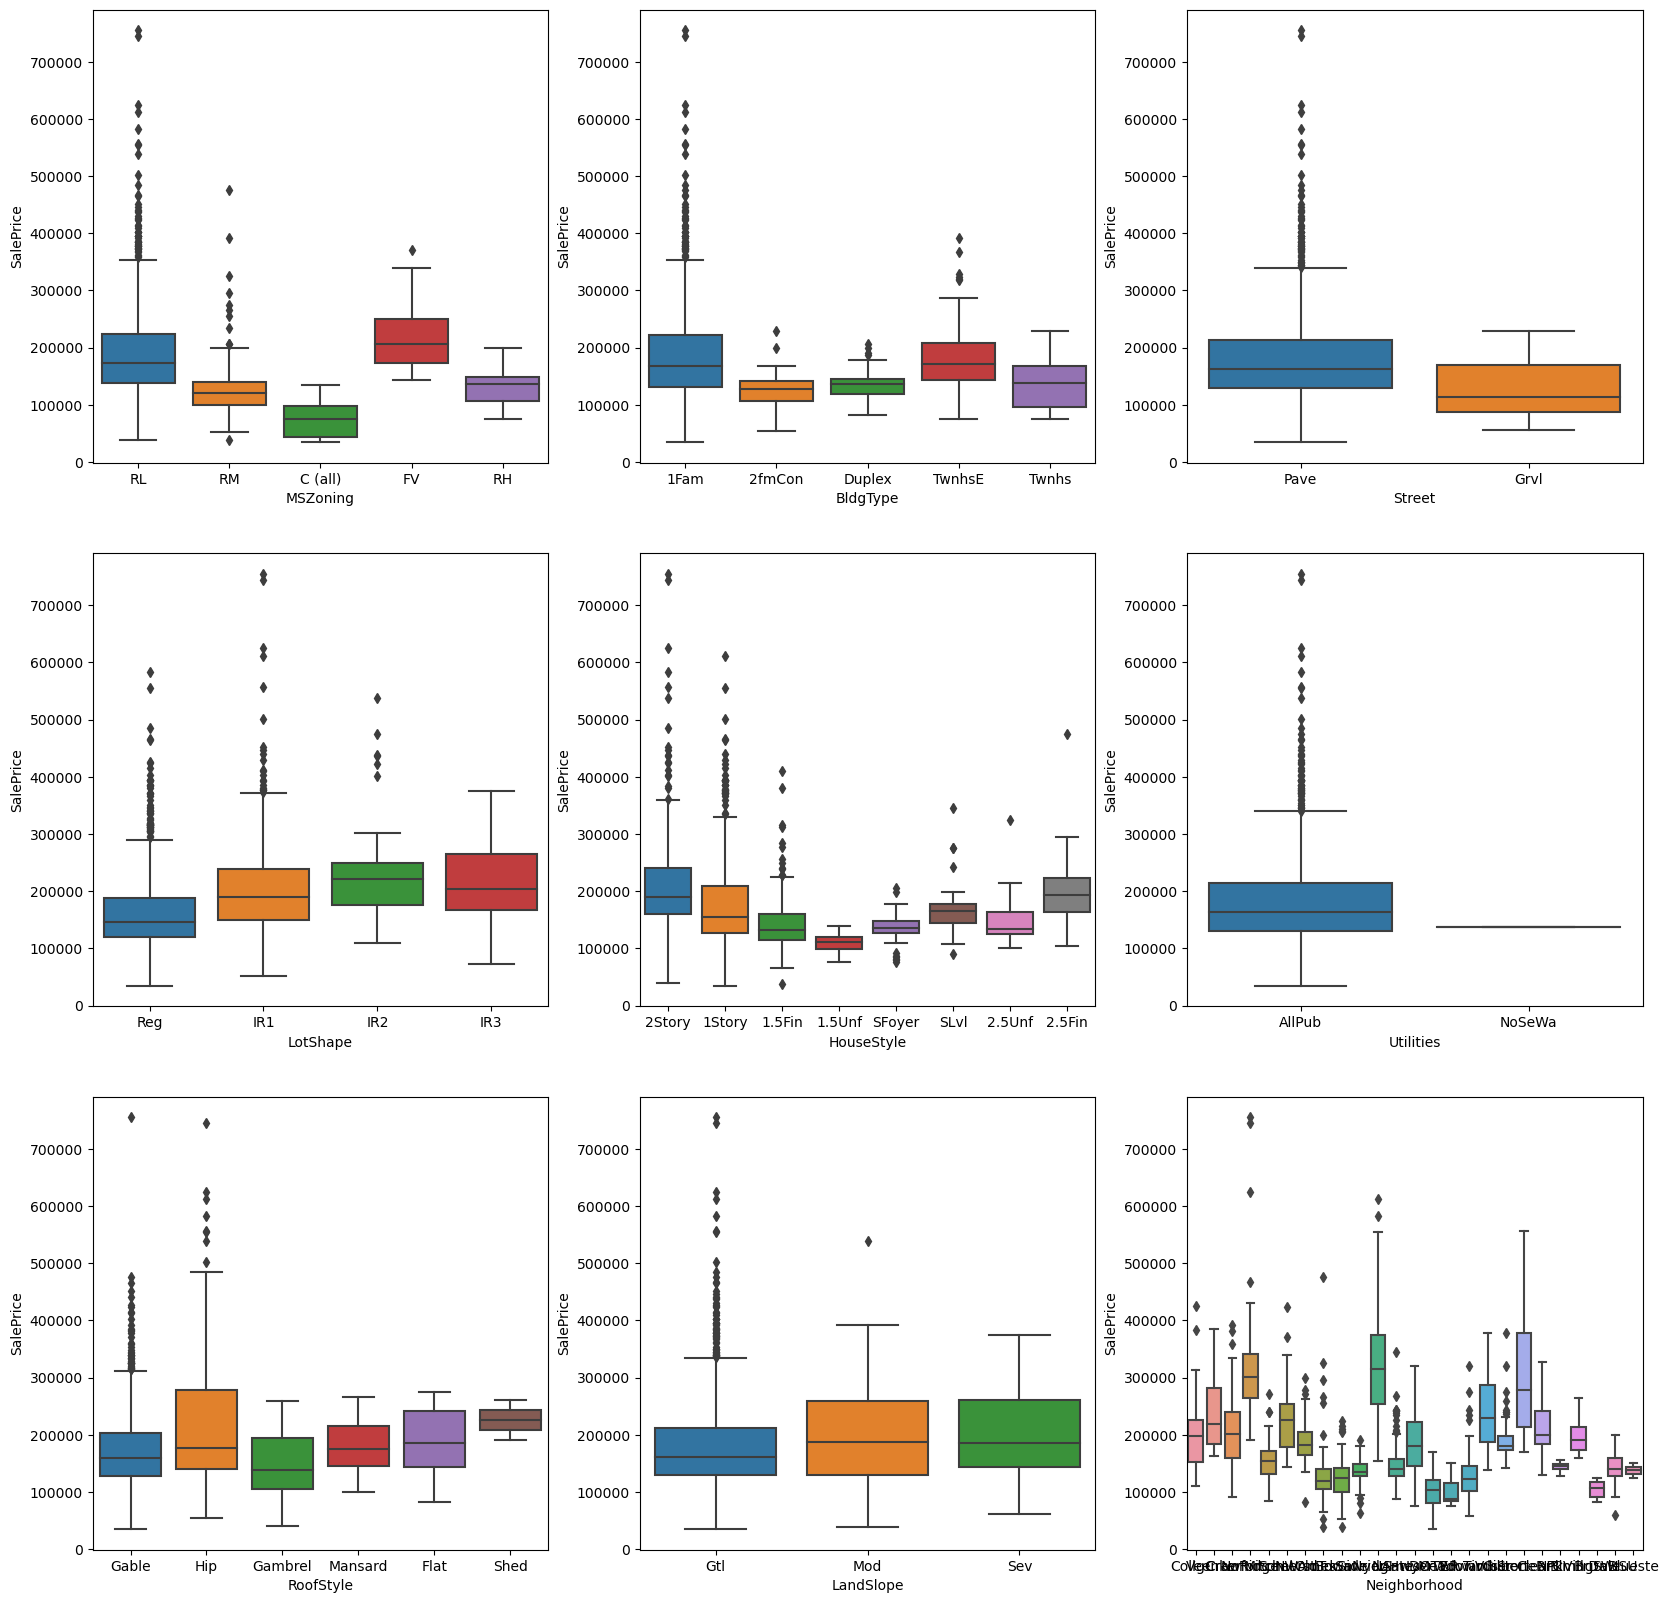

In [92]:
# Box plot for further analysis
plt.figure(figsize = (20,20)) 

# MSZoning vs SalePrice
plt.subplot(3,3,1)
sns.boxplot(x='MSZoning', y="SalePrice", data=housing_data)

# BldgType vs SalePrice
plt.subplot(3,3,2)
sns.boxplot(x='BldgType', y="SalePrice", data=housing_data)

# Street vs SalePrice
plt.subplot(3,3,3)
sns.boxplot(x='Street', y="SalePrice", data=housing_data)

# LotShape vs SalePrice
plt.subplot(3,3,4)
sns.boxplot(x='LotShape', y="SalePrice", data=housing_data)

# HouseStyle vs SalePrice
plt.subplot(3,3,5)
sns.boxplot(x='HouseStyle', y="SalePrice", data=housing_data)

# Utilities vs SalePrice
plt.subplot(3,3,6)
sns.boxplot(x='Utilities', y="SalePrice", data=housing_data)

# RoofStyle vs SalePrice
plt.subplot(3,3,7)
sns.boxplot(x='RoofStyle', y="SalePrice", data=housing_data)

# LandSlope vs SalePrice
plt.subplot(3,3,8)
sns.boxplot(x='LandSlope', y="SalePrice", data=housing_data)

# Neighborhood vs SalePrice
plt.subplot(3,3,9)
sns.boxplot(x='Neighborhood', y="SalePrice", data=housing_data)
plt.show()

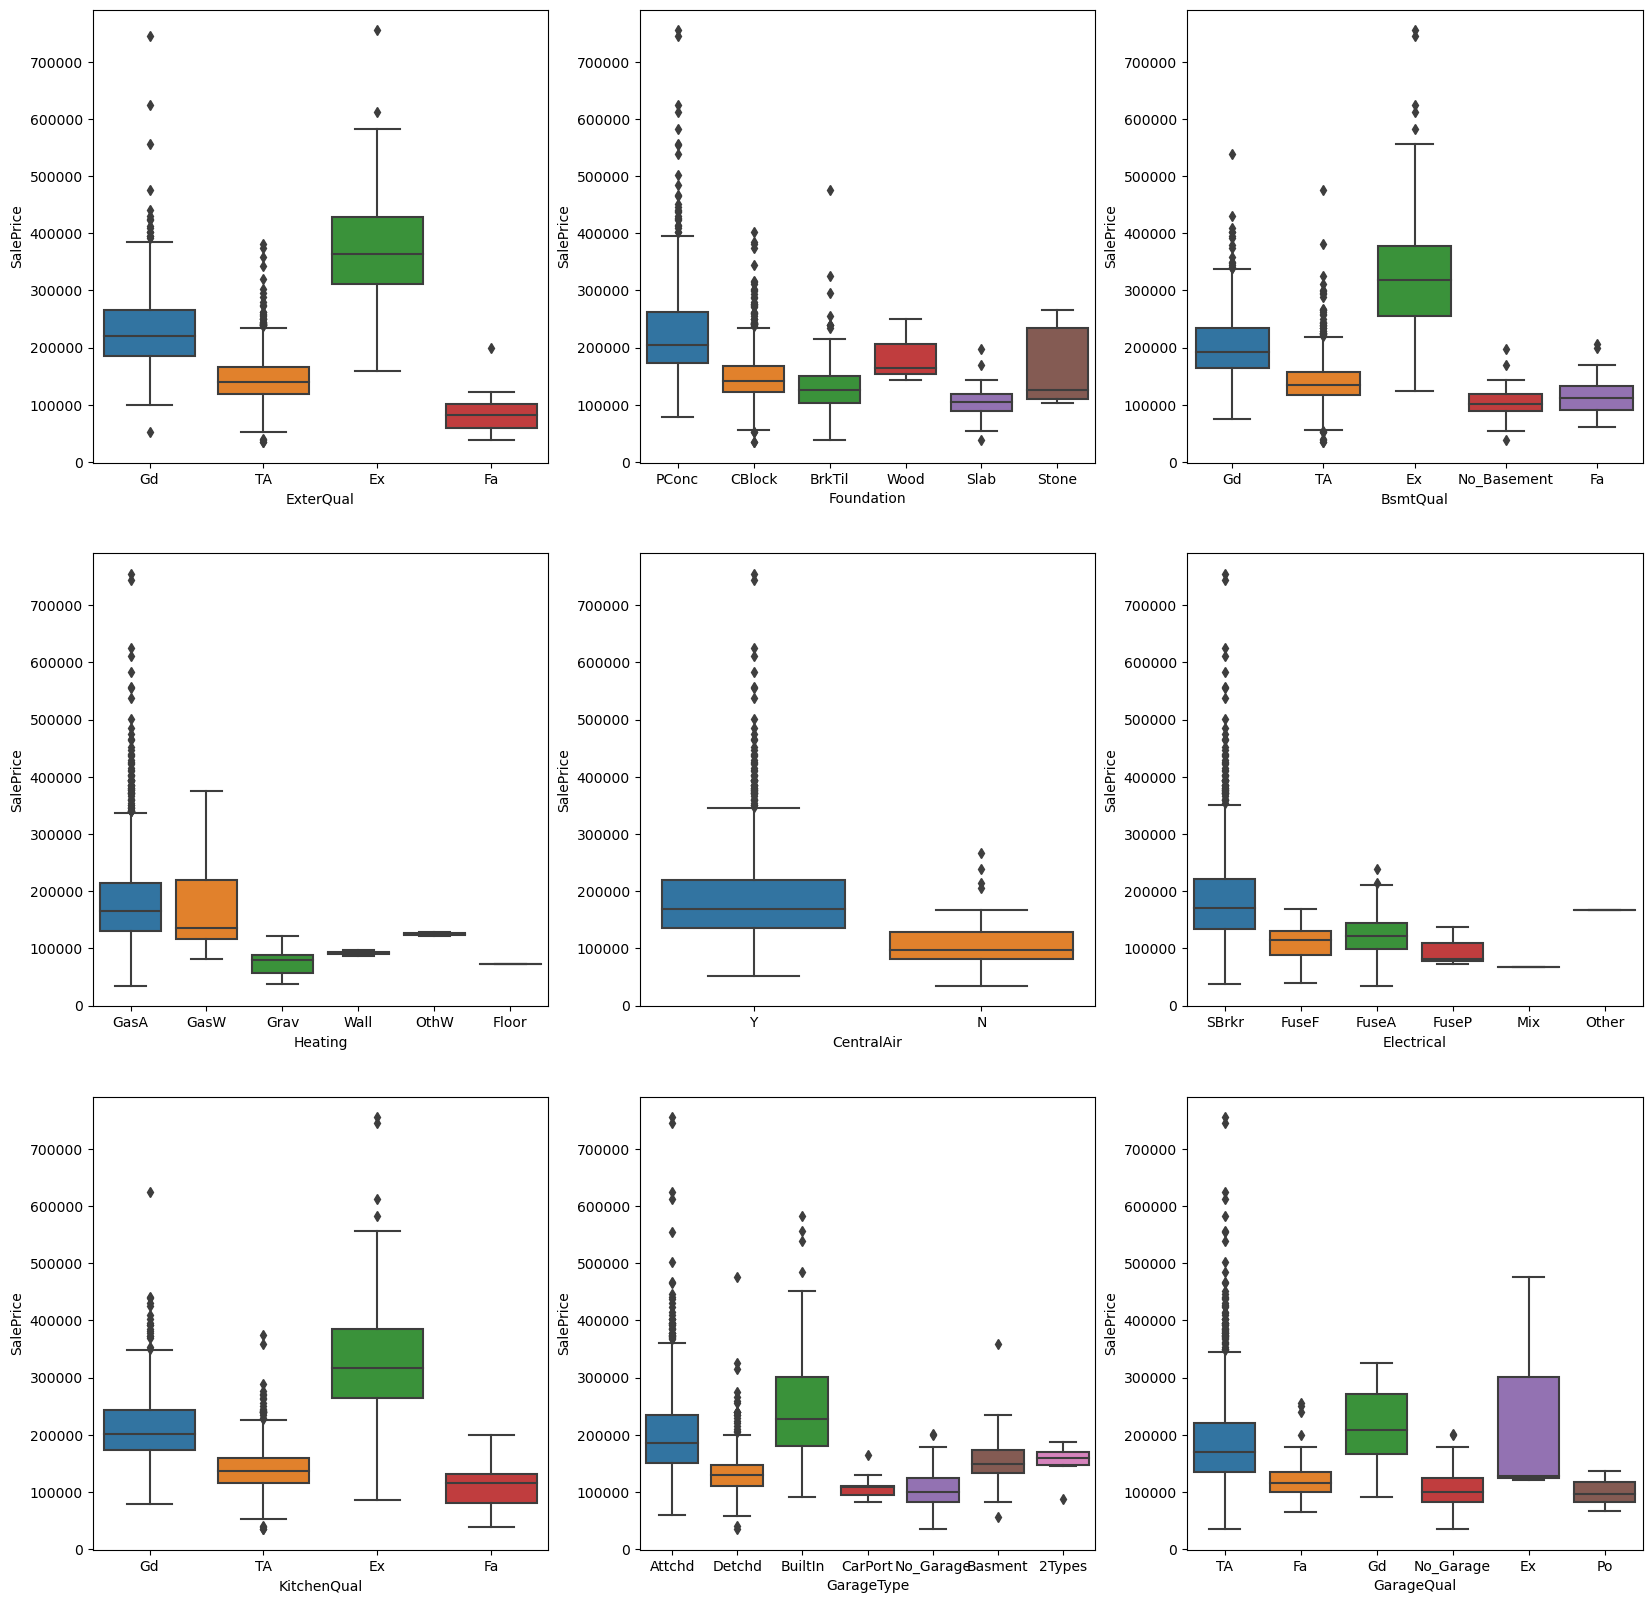

In [93]:
# Box plot for further analysis
plt.figure(figsize = (20,20)) 

# ExterQual vs SalePrice
plt.subplot(3,3,1)
sns.boxplot(x='ExterQual', y="SalePrice", data=housing_data)

# Foundation vs SalePrice
plt.subplot(3,3,2)
sns.boxplot(x='Foundation', y="SalePrice", data=housing_data)

# BsmtQual vs SalePrice
plt.subplot(3,3,3)
sns.boxplot(x='BsmtQual', y="SalePrice", data=housing_data)

# Heating vs SalePrice
plt.subplot(3,3,4)
sns.boxplot(x='Heating', y="SalePrice", data=housing_data)

# CentralAir vs SalePrice
plt.subplot(3,3,5)
sns.boxplot(x='CentralAir', y="SalePrice", data=housing_data)

# Electrical vs SalePrice
plt.subplot(3,3,6)
sns.boxplot(x='Electrical', y="SalePrice", data=housing_data)

# KitchenQual vs SalePrice
plt.subplot(3,3,7)
sns.boxplot(x='KitchenQual', y="SalePrice", data=housing_data)

# GarageType vs SalePrice
plt.subplot(3,3,8)
sns.boxplot(x='GarageType', y="SalePrice", data=housing_data)

# GarageQual vs SalePrice
plt.subplot(3,3,9)
sns.boxplot(x='GarageQual', y="SalePrice", data=housing_data)
plt.show()

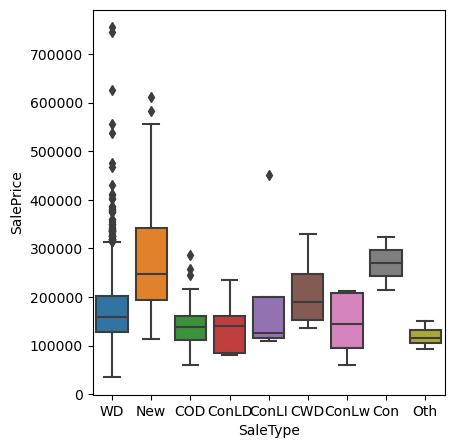

In [94]:
# SaleType vs SalePrice
plt.figure(figsize = (10,5)) 
plt.subplot(1,2,1)
sns.boxplot(x='SaleType', y="SalePrice", data=housing_data)
plt.show()

In [95]:
# Find Skewness and Kurtosis
print("Skewness: ",housing_data['SalePrice'].skew())
print("Kurtosis:",housing_data['SalePrice'].kurt())

Skewness:  1.8828757597682129
Kurtosis: 6.536281860064529


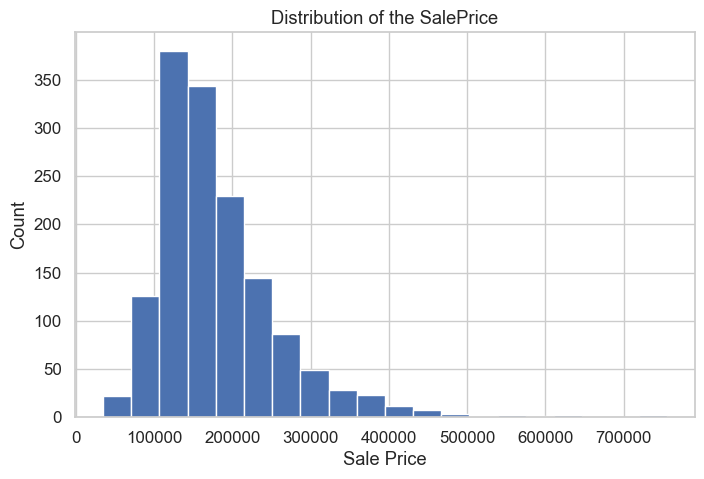

In [96]:
# Checking the distribution the SalePrice
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(housing_data['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice")
plt.show()

## Step 4: Data preparation for linar regression

#### Manual Mapping/ Encoding categorical variables

In [97]:
# Encoding
housing_data['Street'] = housing_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
housing_data['CentralAir'] = housing_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
housing_data['PavedDrive'] = housing_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)       

In [98]:
# Check data
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,No_Alley_Access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,1,No_Alley_Access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,1,No_Alley_Access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,1,No_Alley_Access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,No_Alley_Access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,12,2008,WD,Normal,250000


### Step 4.1: Create Dummy Variables

In [99]:
# Convert categorical value into Dummy variable
data_dummies = pd.get_dummies(housing_data.select_dtypes(include=['object']), drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [100]:
# Adding the results back to the dataframe
housing_data = pd.concat([housing_data,data_dummies], axis=1)

In [101]:
# Dropping column Id
housing_data = housing_data.drop(['Id'],axis=1)

In [102]:
# Dropping the columns whose dummies have been created
housing_data = housing_data.drop(list(housing_data.select_dtypes(include=['object']).columns), axis=1)

In [103]:
# Checking the shape
housing_data.shape

(1460, 260)

### Step 4.2: Splitting data into train and test data

In [104]:
# Model building - Test Train split
df_train,df_test = train_test_split(housing_data, train_size=0.7,test_size = 0.3, random_state=100)

In [105]:
# y to contain only target variable and X is all remainign variable also our independent variables
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [106]:
# Getting all Numerical columns
numerical_columns = X_train.select_dtypes(include=['int64','float64']).columns
numerical_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

### Step 4.3:  Using MinMaxScaler to Rescaling the features

In [107]:
#  Scalling the X_train numerical columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [108]:
# Building a Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [109]:
# Cut down number of features to 80 using automated approach
rfe = RFE(reg,n_features_to_select= 80)
rfe = rfe.fit(X_train, y_train)

In [110]:
# Columns selected by RFE
col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_NridgHt', 'Neighborhood_SWISU',
       'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'BldgType_Duplex',
       'HouseStyle_2.5Fin', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA',
       'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Gd

## Step 5: Building Model using Recursive Feature Elimination (RFE)

In [111]:
# Building a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [112]:
# Generic function to calculate VIF of variables
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Linear Regression Model

In [113]:
# Linear Regression Model - all columns selected by RFE
build_model(col)
print('')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('')
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     198.5
Date:                Tue, 26 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:23:22   Log-Likelihood:                 884.42
No. Observations:                1021   AIC:                            -1631.
Df Residuals:                     952   BIC:                            -1291.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

                Features   VIF
40    Exterior1st_CBlock   inf
37   Exterior1st_AsphShn   inf
42    Exterior2nd_CBlock   inf
49  BsmtQual_No_Basement   inf
51  BsmtCond_No_Basement   inf
..                   ...   ...
22       Condition1_Norm  1.18
18  Neighborhood_MeadowV  1.16
39   Exterior1st_BrkFace  1.12
24       Condition2_PosN  1.10
47       Foundation_Wood  1.02

[80 rows x 2 columns]


##### R-squared: 93.4%

## Step 6: Ridge Regression Model

### 6.1 Ridge Model with multiple alpha

In [114]:
# Building a Ridge regression model with alpha 0.001
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print('Ridge Regression Model R Squared = ',r2_score(y_train,y_train_pred))

Ridge Regression Model R Squared =  0.9590213825116983


In [115]:
# Tuning Ridge Regression Model with multiple alpha
alpha = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

ridge = Ridge()

# Cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = alpha, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
print('alpha = ',model_cv.best_params_)
print('best_score = ',model_cv.best_score_)

alpha =  {'alpha': 0.1}
best_score =  -0.08882791369582359


In [117]:
# Print the data
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022802,0.007725,0.006333,0.006260,0.0001,{'alpha': 0.0001},-0.091449,-0.095705,-0.095119,-0.086914,...,-0.090440,0.004863,14,-0.054652,-0.055098,-0.055696,-0.056782,-0.055431,-0.055532,0.000716
1,0.019505,0.004972,0.009159,0.004156,0.001,{'alpha': 0.001},-0.091047,-0.095653,-0.095065,-0.086749,...,-0.090272,0.004901,12,-0.054690,-0.055107,-0.055708,-0.056867,-0.055473,-0.055569,0.000735
2,0.023255,0.002256,0.010544,0.001232,0.01,{'alpha': 0.01},-0.090375,-0.095289,-0.094704,-0.086016,...,-0.089787,0.004928,8,-0.054886,-0.055228,-0.055832,-0.057085,-0.055644,-0.055735,0.000751
3,0.024510,0.002919,0.009893,0.000915,0.05,{'alpha': 0.05},-0.089975,-0.094389,-0.094146,-0.084068,...,-0.089109,0.004839,4,-0.055836,-0.055701,-0.056443,-0.057713,-0.056506,-0.056440,0.000712
4,0.023292,0.003174,0.010295,0.002176,0.1,{'alpha': 0.1},-0.089795,-0.093888,-0.094207,-0.082689,...,-0.088828,0.004917,1,-0.056996,-0.056179,-0.057209,-0.058638,-0.057660,-0.057336,0.000809


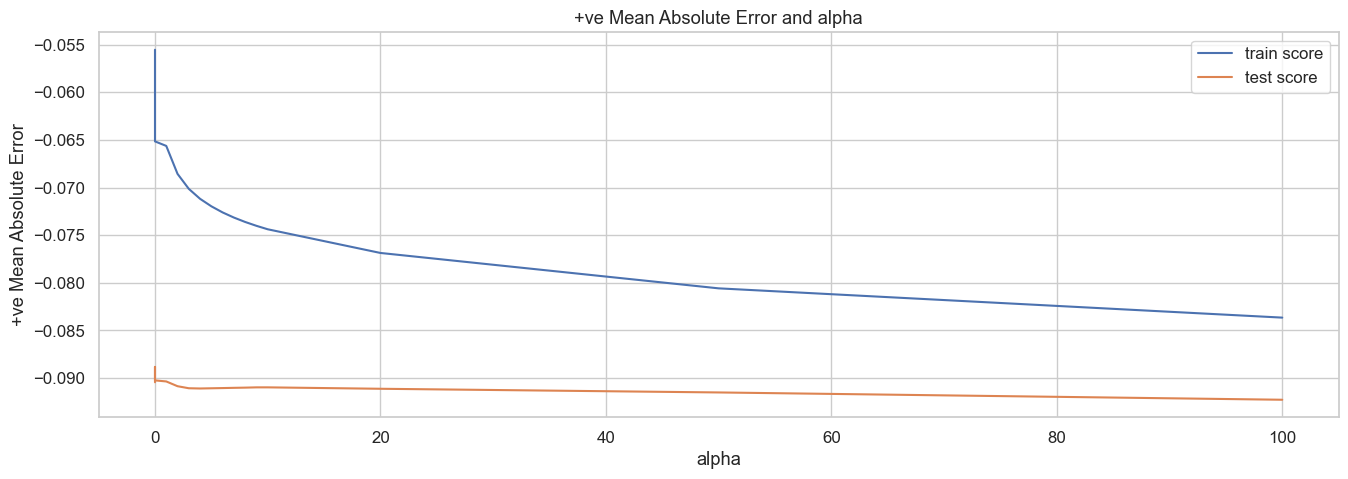

In [118]:
# Plotting mean test and train score with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('+ve Mean Absolute Error')
plt.title("+ve Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### 6.2 Final Ridge Model with alpha = 0.1

In [119]:
# Final Ridge Model with alpha = 0.1
alpha = 0.1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.81785486e-02,  5.08169749e-03,  2.94447628e-02,  5.66891825e-03,
        5.63672348e-02,  3.79152060e-02,  5.60118406e-02,  2.24292378e-02,
       -2.64766365e-05,  2.71237356e-02,  8.60295186e-03,  7.10223056e-03,
        3.76077416e-02,  1.23811600e-02,  4.68576707e-02,  4.75125653e-02,
        6.20311171e-04,  7.39860860e-02,  1.45022528e-02,  7.52467801e-04,
        6.31508351e-03,  2.23821010e-03,  9.27163189e-03, -1.44545200e-02,
        3.46150550e-03, -2.27719374e-03, -1.35634021e-05,  1.84021064e-02,
        1.83571500e-02,  2.57492194e-03,  1.06648965e-02,  3.64833391e-03,
        7.00178295e-03,  4.63808134e-03,  8.16097691e-03,  1.14958341e-02,
        2.84375784e-03,  1.04784105e-03, -3.33010007e-03,  3.99538066e-01,
        3.96173443e-01,  4.00781115e-01,  3.54199688e-01,  2.09851005e-02,
        3.92732774e-02,  1.50338188e-02, -2.73373960e-02,  7.06650833e-03,
        2.08018005e-02,  1.74124983e-02,  3.51252793e-02, -9.60793677e-02,
        3.29255515e-02, -

In [120]:
# lets predict the R-squared value 
y_train_pred = ridge.predict(X_train)
print('Ridge Regression Model R Squared on train set= ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

Ridge Regression Model R Squared on train set=  0.9576155703233272


In [121]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print('Ridge Regression Model R Squared on test set= ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Ridge Regression Model R Squared on test set=  0.7453209173973485


In [122]:
# Printing the RMSE value
print('Ridge Regression Model RMSE = ',mean_squared_error(y_test, y_test_pred))

Ridge Regression Model RMSE =  0.04190492592868699


In [123]:
# Get top 10 features selected by Ridge Regression Model
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,10.820917
115,RoofMatl_Membran,0.433167
42,MSZoning_RL,0.400781
40,MSZoning_FV,0.399538
41,MSZoning_RH,0.396173
43,MSZoning_RM,0.354200
117,RoofMatl_Roll,0.308925
116,RoofMatl_Metal,0.302188
120,RoofMatl_WdShngl,0.301898
238,PoolQC_No_Pool,0.255124


## Step 7: Lasso Regression Model


### 7.1 Lasso Regression Model with multiple alpha

In [124]:
# Lasso Regression Model
alpha = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = alpha, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [125]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [126]:
print('alpha = ',lasso_cv.best_params_)
print('best_score = ',lasso_cv.best_score_)

alpha =  {'alpha': 0.0001}
best_score =  -0.08340357600750696


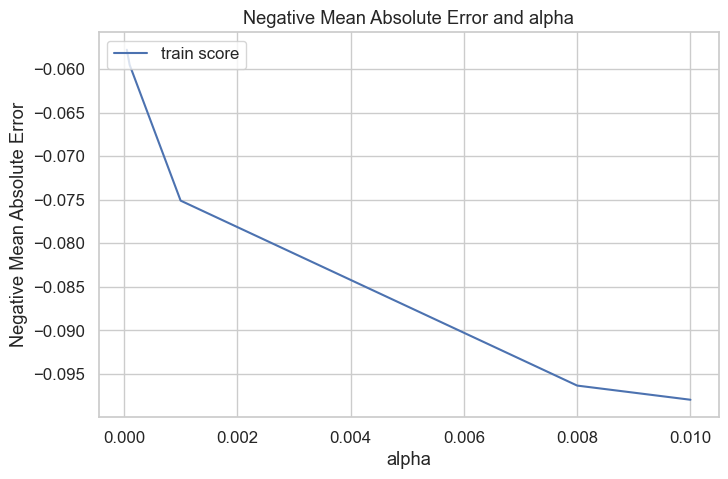

In [127]:
# Plotting mean test and train scoes with alpha 
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### 7.1 Final lasso model with alpha 0.0001

In [128]:
# Final lasso model with alpha 0.0001
alpha = 0.0001

lasso = Lasso(alpha=alpha)       
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [129]:
# Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print('Lasso Regression Model - R-squared value for train data = ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

Lasso Regression Model - R-squared value for train data =  0.9550001917974374


In [130]:
# Predict the R-squared value for test data
y_test_pred = lasso.predict(X_test)
print('Lasso Regression Model - R-squared value for test data = ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Lasso Regression Model - R-squared value for test data =  0.6590968486550755


In [131]:
# Printing the RMSE value
print('Lasso Regression Model RMSE = ',mean_squared_error(y_test, y_test_pred))

Lasso Regression Model RMSE =  0.056092244247059754


In [132]:
# Printing lasso.coef
lasso.coef_

array([-1.85937655e-02,  7.51453113e-03,  2.24691792e-02,  4.95215052e-03,
        5.94337595e-02,  4.20527623e-02,  5.77101942e-02,  2.38922082e-02,
        1.52179055e-03,  2.72398414e-02,  9.23421305e-03,  3.47846736e-03,
        4.23517054e-02,  1.39689861e-02,  7.97525208e-02,  8.34050584e-02,
        1.76613088e-03,  3.14310888e-02,  1.56930323e-02, -3.38112640e-04,
        6.32211615e-03,  3.49278180e-03,  4.77847624e-03, -1.47638252e-02,
        4.37230062e-03,  0.00000000e+00,  3.51974857e-06,  1.66874914e-02,
        1.95042708e-02,  2.61903202e-03,  1.13674166e-02,  6.45841514e-03,
        4.88524428e-03,  4.02147817e-03,  7.08719999e-03,  3.41960949e-04,
       -1.06728507e-03, -8.33676272e-04, -3.21213182e-03,  3.10431085e-01,
        3.10072476e-01,  3.12930662e-01,  2.69740573e-01,  1.23486643e-02,
        3.11102590e-02,  6.66490146e-03, -5.10871417e-03,  5.89486744e-03,
        5.59303272e-03,  1.22166696e-02,  1.59220379e-02, -0.00000000e+00,
        3.76716434e-02, -

In [133]:
# Get top 10 features selected by Lasso Regression Model
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,11.575684
42,MSZoning_RL,0.312931
40,MSZoning_FV,0.310431
41,MSZoning_RH,0.310072
43,MSZoning_RM,0.269741
249,SaleType_ConLD,0.211382
64,Neighborhood_Crawfor,0.144122
80,Neighborhood_StoneBr,0.100168
211,Functional_Typ,0.088827
123,Exterior1st_BrkFace,0.086317


================================================================================================================
## 8. Conclusion


#### Linear Regression Model:
<li>R-squared = 93.5%</li>

#### Ridge Regression Model:
    alpha: 0.1
    R Squared on train set =  95%
    R Squared on test set =  74%
    RMSE =  0.041
    
    Top 10 feature variables:
        MSSubClass
        RoofMatl_Membran
        MSZoning_RL
        MSZoning_FV
        MSZoning_RH
        MSZoning_RM
        RoofMatl_Roll
        RoofMatl_Metal
        RoofMatl_WdShngl
        PoolQC_No_Pool
        
#### Lasso Regression Model:
    alpha: 0.0001
    R Squared on train set =  95%
    R Squared on test set =  65%
    RMSE =  0.056
    
    Top 10 feature variables:
        MSSubClass
        MSZoning_RL
        MSZoning_FV
        MSZoning_RH
        MSZoning_RM
        SaleType_ConLD
        Neighborhood_Crawfor
        Neighborhood_StoneBr
        Functional_Typ
        Exterior1st_BrkFace	
